M=1 train error 84854.74088522248
M=1 test error 71105.78029589106
M=2 train error 83289.69129079912
M=2 test error 72133.95110701179
M=3 train error 82229.28849445256
M=3 test error 70169.53509327925

M=3 withoutx1 train error 83730.34554561363
M=3 withoutx2 train error 83893.56376074965
M=3 withoutx3 train error 107630.6009513739

M=1 λ= 0.1 train error 84854.74120939037
M=1 λ= 0.1 test error 71103.11705601607
M=1 λ= 0.001 train error 84854.7421808946
M=1 λ= 0.001 test error 71100.45651958665

M=2 λ= 0.1 train error 83289.69138459643
M=2 λ= 0.1 test error 72132.96805228578
M=2 λ= 0.001 train error 83289.69166534889
M=2 λ= 0.001 test error 72131.98557324012

M=3 λ= 0.1 train error 82229.28877619746
M=3 λ= 0.1 test error 70168.83348475877
M=3 λ= 0.001 train error 82229.28961963675
M=3 λ= 0.001 test error 70168.12975872032


<IPython.core.display.Javascript object>


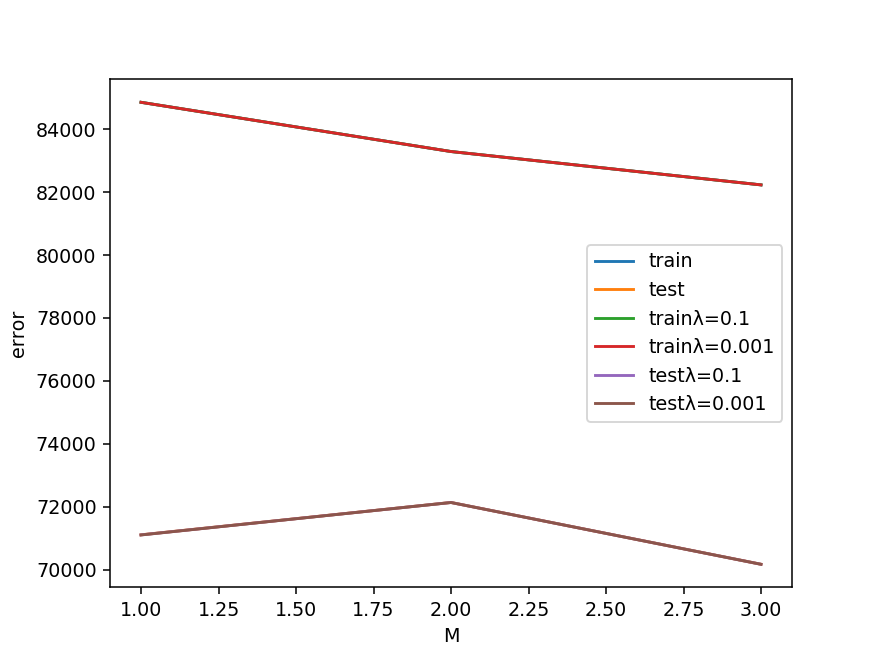

In [16]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import linalg
from math import sqrt
import matplotlib.pyplot as plt

#將M=1~3資料讀近來
M1 = pd.read_csv('M1.csv', index_col=0)
M2 = pd.read_csv('M2.csv', index_col=0)
M3 = pd.read_csv('M3.csv', index_col=0)
y = pd.read_csv('y.csv', index_col=0)


#切M1資料
row=M1.shape[0] 
M1_train=M1.iloc[0:18576]
M1_test=M1.iloc[18576:row]

#切M2資料
for i in range (1,4):
    for j in range (1,4):
        if(i>j):
            M2 = M2.drop([str(i)+str(j)], axis=1)
row=M2.shape[0] 
M2_train=M2.iloc[0:18576]
M2_test=M2.iloc[18576:row]

#切M3資料
for i in range (1,4):
    for j in range (1,4):
        if(i>j):
            M3 = M3.drop([str(i)+str(j)], axis=1)
        for k in range (1,4):
            if(i>k or i>j or j>k):
                M3 = M3.drop([str(i)+str(j)+str(k)], axis=1)
                
                
            
#做第二題C3取2的資料
row=M3.shape[0] 
M3_train=M3.iloc[0:18576]
M3_test=M3.iloc[18576:row]
M3_train_withoutx1 = M3_train.drop(['X1'], axis=1)
M3_train_withoutx2 = M3_train.drop(['X2'], axis=1)
M3_train_withoutx3 = M3_train.drop(['X3'], axis=1)
for i in range (1,4):
    for j in range (1,4):
        if(i==1 or j==1):
                if(i<=k & i<=j):
                    M3_train_withoutx1 = M3_train_withoutx1.drop([str(i)+str(j)], axis=1)
        for k in range (1,4):
            if(i==1 or j==1 or k==1):
                if(i<=j & j<=k):
                    M3_train_withoutx1 = M3_train_withoutx1.drop([str(i)+str(j)+str(k)], axis=1)
for i in range (1,4):
    for j in range (1,4):
        if(i==2 or j==2):
                if(i<=k & i<=j):
                    M3_train_withoutx2 = M3_train_withoutx2.drop([str(i)+str(j)], axis=1)
        for k in range (1,4):
            if(i==2 or j==2 or k==2):
                if(i<=j & j<=k):
                    M3_train_withoutx2 = M3_train_withoutx2.drop([str(i)+str(j)+str(k)], axis=1)
for i in range (1,4):
    for j in range (1,4):
        if(i==3 or j==3):
                if(i<=k & i<=j):
                    M3_train_withoutx3 = M3_train_withoutx3.drop([str(i)+str(j)], axis=1)
        for k in range (1,4):
            if(i==3 or j==3 or k==3):
                if(i<=j & j<=k):
                    M3_train_withoutx3 = M3_train_withoutx3.drop([str(i)+str(j)+str(k)], axis=1)


#切y資料
row=y.shape[0] 
y_train=y.iloc[0:18576]
y_test=y.iloc[18576:row]

#將M1~到M3以及y換成matrix
M1_train = M1_train.values
M1_test = M1_test.values
M2_train = M2_train.values
M2_test = M2_test.values
M3_train = M3_train.values
M3_test = M3_test.values
y_train = y_train.values
y_test = y_test.values

#def rms function
def rms(predict, y):
    error = 0
    count = 0
    y_error = y-predict
    for i in range (0,y_error.shape[0]):
        error = error+(y_error[i]*y_error[i])
        count = count+1
    rms = sqrt(error/count)
    return rms

#要繪圖的list
trainlist = []
testlsit = []


#解第一題M=1的close form
M1_trainpinv = np.linalg.pinv(M1_train)
M1_weight = np.dot(M1_trainpinv,y_train)

M1_predict_train = np.dot(M1_train,M1_weight)
M1_predict_test = np.dot(M1_test,M1_weight)
train_rms = rms(y_train, M1_predict_train)
test_rms = rms(y_test, M1_predict_test)
print('M=1 train error',train_rms)
print('M=1 test error',test_rms)
trainlist.append(train_rms)
testlsit.append(test_rms)

#解第一題M=2的close form
M2_trainpinv = np.linalg.pinv(M2_train)
M2_weight = np.dot(M2_trainpinv,y_train)

M2_predict_train = np.dot(M2_train,M2_weight)
M2_predict_test = np.dot(M2_test,M2_weight)
train_rms = rms(y_train, M2_predict_train)
test_rms = rms(y_test, M2_predict_test)
print('M=2 train error',train_rms)
print('M=2 test error',test_rms)
trainlist.append(train_rms)
testlsit.append(test_rms)

#解第一題M=3的close form
M3_trainpinv = np.linalg.pinv(M3_train)
M3_weight = np.dot(M3_trainpinv,y_train)

M3_predict_train = np.dot(M3_train,M3_weight)
M3_predict_test = np.dot(M3_test,M3_weight)
train_rms = rms(y_train, M3_predict_train)
test_rms = rms(y_test, M3_predict_test)
print('M=3 train error',train_rms)
print('M=3 test error',test_rms)
trainlist.append(train_rms)
testlsit.append(test_rms)
print(                                         )
#解第二題誰的貢獻大
M3_train_withoutx1pinv = np.linalg.pinv(M3_train_withoutx1)
M3_train_withoutx1_weight = np.dot(M3_train_withoutx1pinv,y_train)
M3_train_withoutx1_predict = np.dot(M3_train_withoutx1,M3_train_withoutx1_weight)
train_rms = rms(y_train, M3_train_withoutx1_predict)
print('M=3 withoutx1 train error',train_rms)

M3_train_withoutx2pinv = np.linalg.pinv(M3_train_withoutx2)
M3_train_withoutx2_weight = np.dot(M3_train_withoutx2pinv,y_train)
M3_train_withoutx2_predict = np.dot(M3_train_withoutx2,M3_train_withoutx2_weight)
train_rms = rms(y_train, M3_train_withoutx2_predict)
print('M=3 withoutx2 train error',train_rms)

M3_train_withoutx3pinv = np.linalg.pinv(M3_train_withoutx3)
M3_train_withoutx3_weight = np.dot(M3_train_withoutx3pinv,y_train)
M3_train_withoutx3_predict = np.dot(M3_train_withoutx3,M3_train_withoutx3_weight)
train_rms = rms(y_train, M3_train_withoutx3_predict)
print('M=3 withoutx3 train error',train_rms)

print(                                         )
#解第三題加入λ=0.1,λ=0.001的影響
trainlist01 = []
testlsit01 = []
trainlist0001 = []
testlsit0001 = []

#regularized error for M1
M1_train_transpose = np.transpose(M1_train)
M1_train__weight = np.dot(M1_train_transpose,M1_train)
for i in range (1,3):
    if(i==1):
        coe = 0.1
    if(i==2):
        coe = 0.001
    M1_train__weight_01 = i*np.eye(4)+M1_train__weight
    M1_train__weight_01 = np.linalg.inv(M1_train__weight_01)
    M1_train__weight_01 = np.dot(M1_train__weight_01,M1_train_transpose)
    M1_train__weight_01 = np.dot(M1_train__weight_01,y_train)
    M1_train_predict = np.dot(M1_train,M1_train__weight_01)
    train_rms =  rms(y_train, M1_train_predict)
    M1_test_predict = np.dot(M1_test,M1_train__weight_01)
    test_rms = rms(y_test, M1_test_predict)
    print('M=1 λ=',coe,'train error',train_rms)
    print('M=1 λ=',coe,'test error',test_rms)
    if(coe==0.1):
        trainlist01.append(train_rms)
        testlsit01.append(test_rms)
    if(coe==0.001):
        trainlist0001.append(train_rms)
        testlsit0001.append(test_rms)


print(                                         )




#regularized error for M2
M2_train_transpose = np.transpose(M2_train)
M2_train__weight = np.dot(M2_train_transpose,M2_train)
for i in range (1,3):
    if(i==1):
        coe = 0.1
    if(i==2):
        coe = 0.001
    M2_train__weight_01 = i*np.eye(10)+M2_train__weight
    M2_train__weight_01 = np.linalg.inv(M2_train__weight_01)
    M2_train__weight_01 = np.dot(M2_train__weight_01,M2_train_transpose)
    M2_train__weight_01 = np.dot(M2_train__weight_01,y_train)
    M2_train_predict = np.dot(M2_train,M2_train__weight_01)
    train_rms = rms(y_train, M2_train_predict)
    
    M2_test_predict = np.dot(M2_test,M2_train__weight_01)
    test_rms = rms(y_test, M2_test_predict)
    
    print('M=2 λ=',coe,'train error',train_rms)
    print('M=2 λ=',coe,'test error',test_rms)
    if(coe==0.1):
        trainlist01.append(train_rms)
        testlsit01.append(test_rms)
    if(coe==0.001):
        trainlist0001.append(train_rms)
        testlsit0001.append(test_rms)


print(                                         )



#regularized error for M3
M3_train_transpose = np.transpose(M3_train)
M3_train__weight = np.dot(M3_train_transpose,M3_train)
for i in range (1,3):
    if(i==1):
        coe = 0.1
    if(i==2):
        coe = 0.001
    M3_train__weight_01 = i*np.eye(20)+M3_train__weight
    M3_train__weight_01 = np.linalg.inv(M3_train__weight_01)
    M3_train__weight_01 = np.dot(M3_train__weight_01,M3_train_transpose)
    M3_train__weight_01 = np.dot(M3_train__weight_01,y_train)
    M3_train_predict = np.dot(M3_train,M3_train__weight_01)
    train_rms = rms(y_train, M3_train_predict)
    M3_test_predict = np.dot(M3_test,M3_train__weight_01)
    test_rms = rms(y_test, M3_test_predict)
    print('M=3 λ=',coe,'train error',train_rms)
    print('M=3 λ=',coe,'test error',test_rms)
    if(coe==0.1):
        trainlist01.append(train_rms)
        testlsit01.append(test_rms)
    if(coe==0.001):
        trainlist0001.append(train_rms)
        testlsit0001.append(test_rms)


#畫圖
x = np.linspace(70000,85000)
plt.plot([1,2,3],trainlist, label='train')
plt.plot([1,2,3],testlsit, label='test')
plt.plot([1,2,3],trainlist01, label='trainλ=0.1')
plt.plot([1,2,3],trainlist0001, label='trainλ=0.001')
plt.plot([1,2,3],testlsit01, label='testλ=0.1')
plt.plot([1,2,3],testlsit0001, label='testλ=0.001')
plt.xlabel('M')
plt.ylabel('error')
plt.legend()
plt.show()

